In [1]:
%run -i ./../common/common
%run -i ./../source_sink/source
%run -i ./../source_sink_freestream/freestream
%matplotlib inline

In [2]:
def sum_velocity(grid, xs, ys, strengths) -> Grid:
    u = np.zeros_like(grid[0])
    v = np.zeros_like(grid[0])
    
    for (x, y, strength) in zip(xs, ys, strengths):
        source = Source(x, y, strength)
        u_add, v_add = source.velocity(grid)
        u += u_add
        v += v_add
    
    return (u, v)

In [3]:
xs = np.loadtxt("./../resources/NACA0012/x.txt")
ys = np.loadtxt("./../resources/NACA0012/y.txt")
strengths = np.loadtxt("./../resources/NACA0012/strength.txt")

In [4]:
N = 50
rect = Rect(-1.0, 2.0, -0.5, 0.5)
grid = rect.make_grid(N)

In [5]:
u, v = sum_velocity(grid, xs, ys, strengths)
stream = Freestream(1.0)
u_str, v_str = stream.velocity(grid)
u += u_str
v += v_str

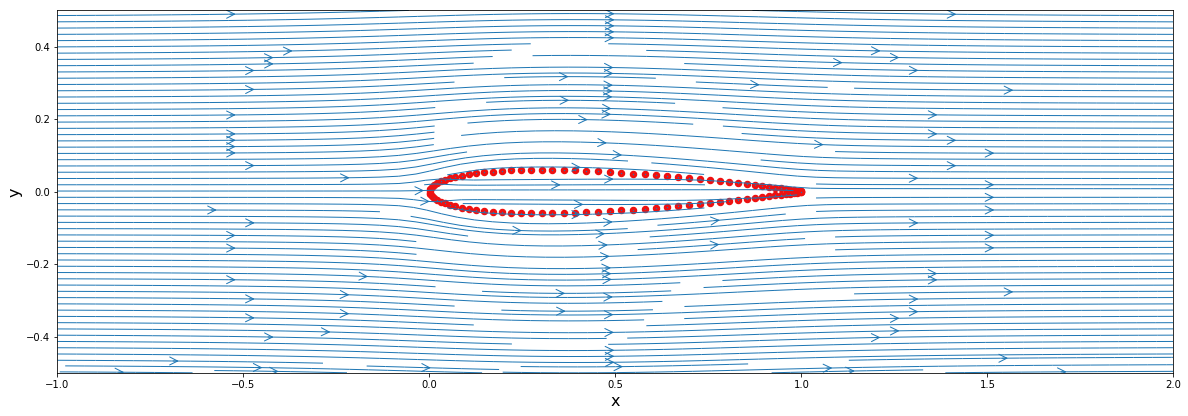

In [7]:
size = 20
setup_fig(rect, size)

plt.streamplot(*grid, u, v, **stream_params)
plt.scatter(xs, ys, s=20, linewidth=3, edgecolor='#EE1111')

In [8]:
def pressure_field(grid: Grid, vel_inf: float) -> 'numpy.ndarray':
    u, v = grid
    return 1.0 - (u**2 + v**2)/vel_inf**2

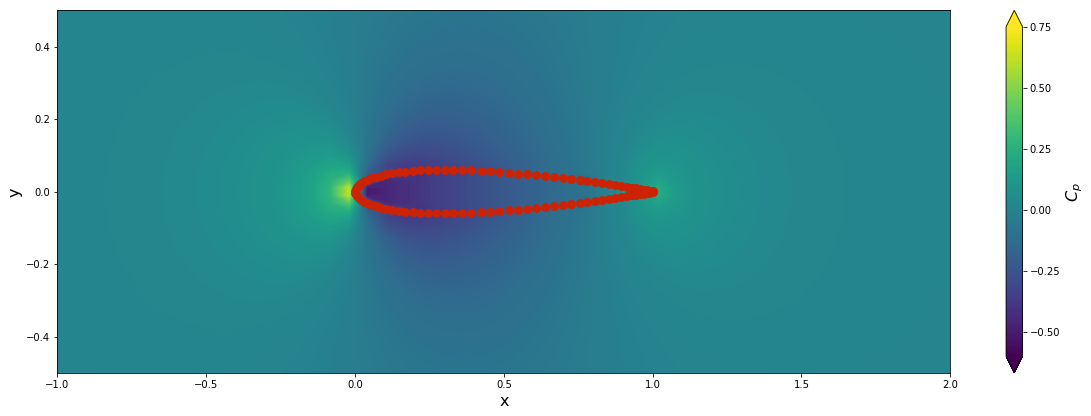

In [9]:
cp = pressure_field((u, v), stream.vel_inf)

setup_fig(rect, size)

contf = plt.contourf(*grid, cp, levels=np.linspace(-0.6, 0.75, 140), extend='both')
cbar = plt.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-0.5, -0.25, 0.0, 0.25, 0.5, 0.75])

plt.scatter(xs, ys, **scatter_params)

In [10]:
max_pressure = np.unravel_index(np.argmax(cp), cp.shape)

In [11]:
def double_index_pair(m, xy):
    x, y = xy
    return (m[0][x][y], m[1][x][y])

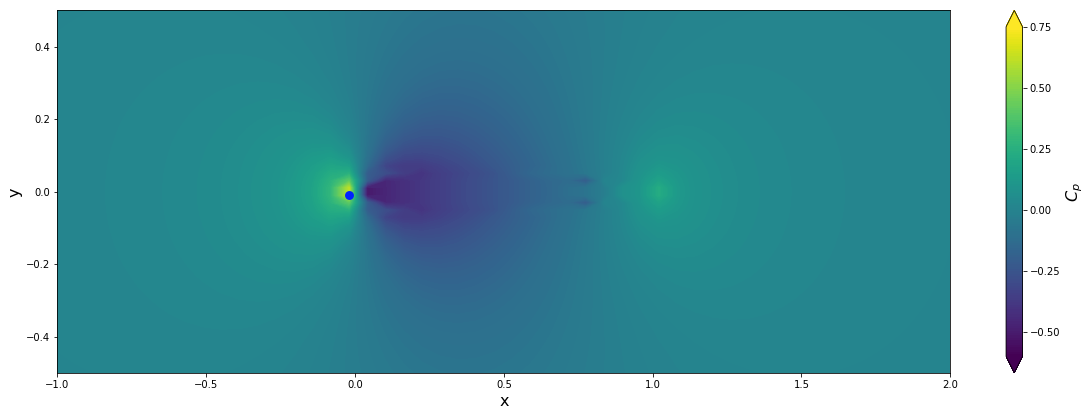

In [12]:
setup_fig(rect, size)

contf = plt.contourf(*grid, cp, levels=np.linspace(-0.6, 0.75, 140), extend='both')
cbar = plt.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-0.5, -0.25, 0.0, 0.25, 0.5, 0.75])

max_pressure_coords = double_index_pair(grid, max_pressure)
scatter_with(*max_pressure_coords, override={'color': '#0022FF'})